In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
data = pd.read_csv('Medical_No_Shows.csv',index_col=None, header=0,delim_whitespace=False,delimiter='\s+|\t+|,',engine='python',usecols=['PatientID','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','LocationID','MedicaidIND','Hypertension','Diabetes','Alcoholism','Disability','SMS_received','No_show'])

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
LocationID        110527 non-null int64
MedicaidIND       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Disability        110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [3]:
#Convert Text into integer
data.No_show = pd.Series(np.where(data.No_show.values == 'Yes', 0, 1), data.index)
data.Gender = pd.Series(np.where(data.Gender.values == 'M', 1, 0), data.index)
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

In [4]:
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_show
0,#29872499824296,5642903,0,2016-04-29 18:38:08,2016-04-29,62,40,0,1,0,0,0,0,1
1,#558997776694438,5642503,1,2016-04-29 16:08:27,2016-04-29,56,40,0,0,0,0,0,0,1
2,#4262962299951,5642549,0,2016-04-29 16:19:04,2016-04-29,62,47,0,0,0,0,0,0,1
3,#867951213174,5642828,0,2016-04-29 17:29:31,2016-04-29,8,55,0,0,0,0,0,0,1
4,#8841186448183,5642494,0,2016-04-29 16:07:23,2016-04-29,56,40,0,1,1,0,0,0,1


In [5]:
data.describe()

,AppointmentID,Gender,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,0.350023,37.088874,42.413076,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,7.129575e+04,0.476979,23.110205,21.885394,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,5.030230e+06,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,0.000000,18.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.680573e+06,0.000000,37.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.725524e+06,1.000000,55.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.790484e+06,1.000000,115.000000,81.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


/Users/Udara/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


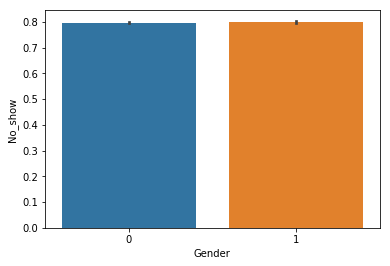

In [6]:
sns.barplot(x='Gender', y='No_show', data=data)

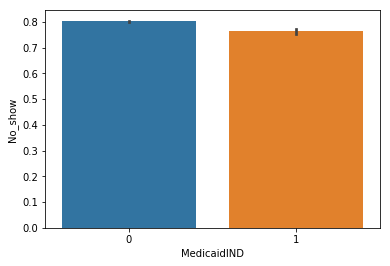

In [7]:
sns.barplot(x='MedicaidIND', y='No_show', data=data)

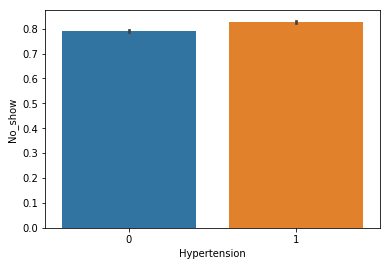

In [8]:
sns.barplot(x='Hypertension', y='No_show', data=data)

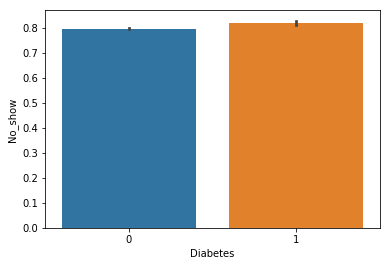

In [9]:
sns.barplot(x='Diabetes', y='No_show', data=data)

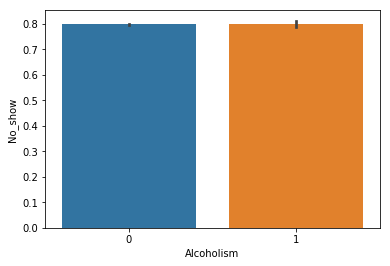

In [10]:
sns.barplot(x='Alcoholism',y='No_show', data=data)

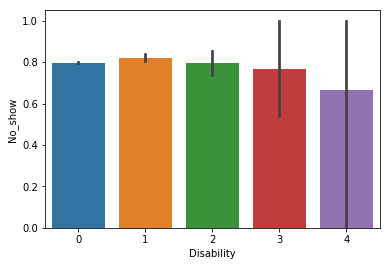

In [11]:
sns.barplot(x='Disability',y='No_show', data=data)

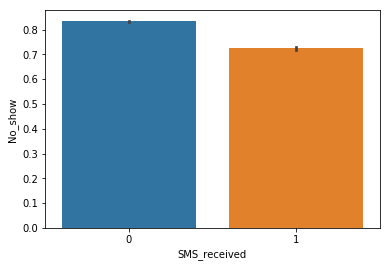

In [12]:
sns.barplot(x='SMS_received',y='No_show', data=data)

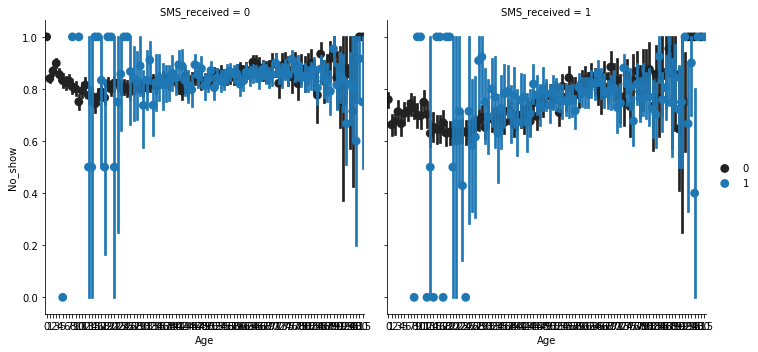

In [13]:
FacetGrid = sns.FacetGrid(data, col='SMS_received', height=5)
FacetGrid.map(sns.pointplot, 'Age', 'No_show', 'Hypertension', palette=None,  order=None, hue_order=None, join=False )
FacetGrid.add_legend()

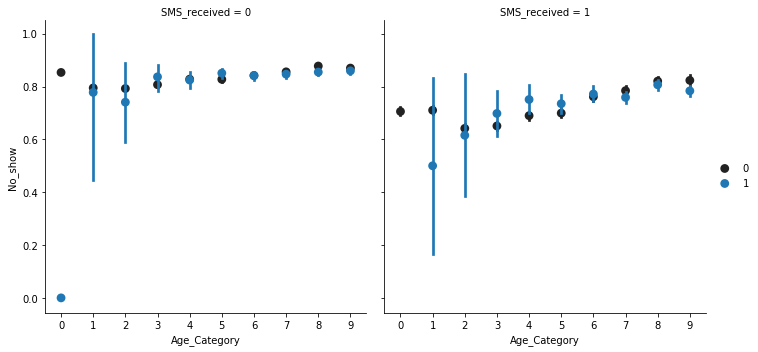

In [14]:
data['Age_Category'] = pd.Series(pd.qcut(data.Age, 10, labels=False), index=data.index)
FacetGrid = sns.FacetGrid(data, col='SMS_received', height=5)
FacetGrid.map(sns.pointplot, 'Age_Category', 'No_show', 'Hypertension', palette=None,  order=None, hue_order=None, join=False )
FacetGrid.add_legend()

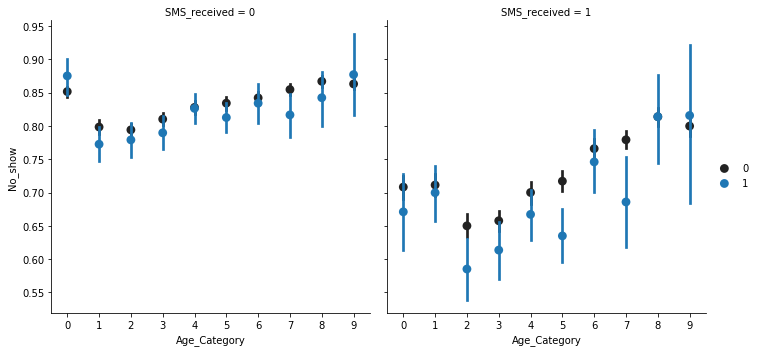

In [15]:
FacetGrid = sns.FacetGrid(data, col='SMS_received', height=5)
FacetGrid.map(sns.pointplot, 'Age_Category', 'No_show', 'MedicaidIND', palette=None,  order=None, hue_order=None, join=False )
FacetGrid.add_legend()

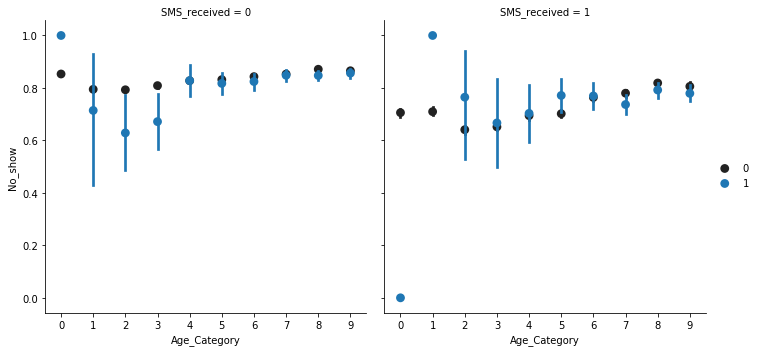

In [16]:
FacetGrid = sns.FacetGrid(data, col='SMS_received', height=5)
FacetGrid.map(sns.pointplot, 'Age_Category', 'No_show', 'Diabetes', palette=None,  order=None, hue_order=None, join=False )
FacetGrid.add_legend()

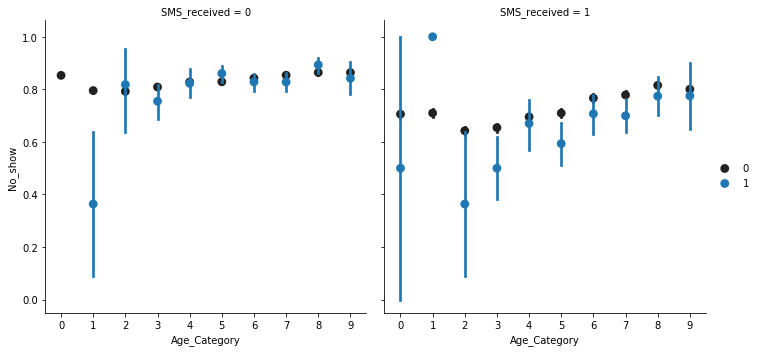

In [17]:
FacetGrid = sns.FacetGrid(data, col='SMS_received', height=5)
FacetGrid.map(sns.pointplot, 'Age_Category', 'No_show', 'Alcoholism', palette=None,  order=None, hue_order=None, join=False )
FacetGrid.add_legend()

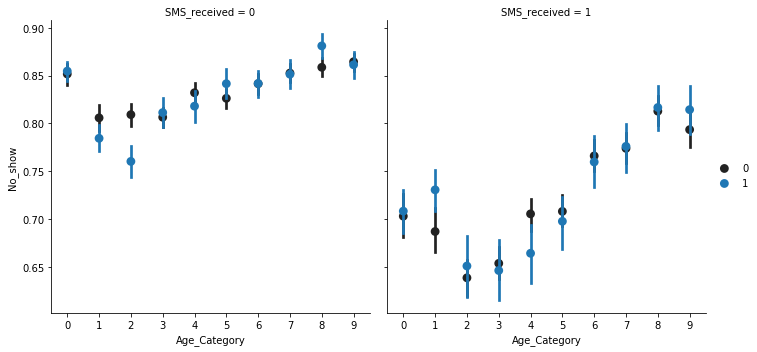

In [18]:
FacetGrid = sns.FacetGrid(data, col='SMS_received', height=5)
FacetGrid.map(sns.pointplot, 'Age_Category', 'No_show', 'Gender', palette=None,  order=None, hue_order=None, join=False )
FacetGrid.add_legend()

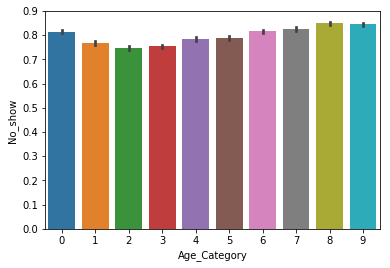

In [19]:
sns.barplot(x='Age_Category',y='No_show', data=data)

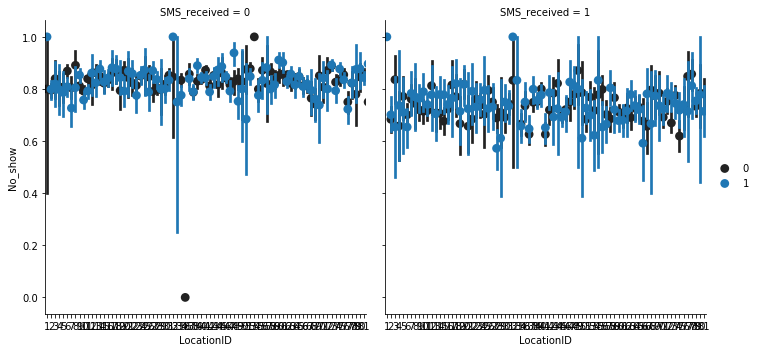

In [20]:
FacetGrid = sns.FacetGrid(data, col='SMS_received', height=5)
FacetGrid.map(sns.pointplot, 'LocationID', 'No_show', 'Gender', palette=None,  order=None, hue_order=None, join=False )
FacetGrid.add_legend()


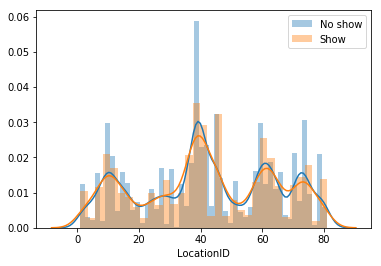

In [22]:
ax = sns.distplot(data[data['No_show'] == 1].LocationID, label ='No show')
ax = sns.distplot(data[data['No_show'] == 0].LocationID, label = 'Show')
ax.legend()

Text(0.5, 0, 'Month')

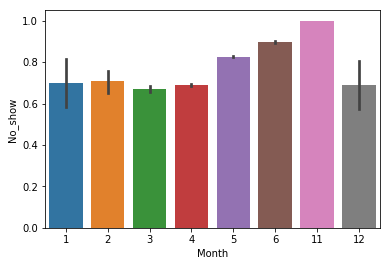

In [23]:
ax = sns.barplot(x=data['ScheduledDay'].dt.month,y='No_show', data=data)
ax.set_xlabel('Month')

In [26]:
data['ScheduledMonth'] = data['ScheduledDay'].dt.month

In [30]:
print(data.groupby('ScheduledMonth').agg(['mean', 'count']))

               AppointmentID           Gender               Age         \
                        mean  count      mean  count       mean  count   
ScheduledMonth                                                           
1               5.260998e+06     60  0.333333     60  55.600000     60   
2               5.373532e+06    281  0.391459    281  51.142349    281   
3               5.478435e+06   3614  0.329828   3614  40.615385   3614   
4               5.606187e+06  25339  0.335491  25339  36.097005  25339   
5               5.694438e+06  67421  0.355705  67421  37.177037  67421   
6               5.770992e+06  13750  0.353818  13750  37.071782  13750   
11              5.030230e+06      1  0.000000      1  51.000000      1   
12              5.143173e+06     61  0.278689     61  63.409836     61   

               LocationID        MedicaidIND         ...   Alcoholism         \
                     mean  count        mean  count  ...         mean  count   
ScheduledMonth           

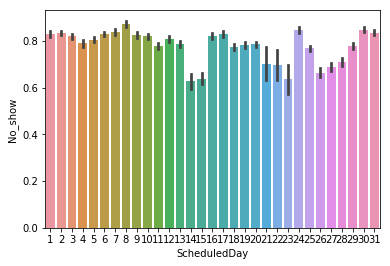

In [32]:
data['ScheduleMonthMM'] = pd.Series(data['ScheduledDay'].dt.month, index=data.index)
sns.barplot(x=data['ScheduledDay'].dt.day,y='No_show', data=data)

In [33]:
data['ScheduleDayDD'] = pd.Series(data['ScheduledDay'].dt.day, index=data.index)

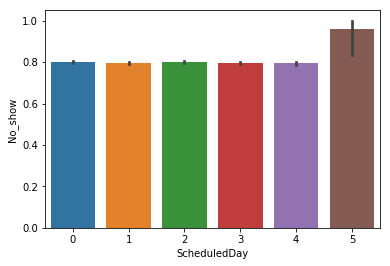

In [34]:
sns.barplot(x=data['ScheduledDay'].dt.weekday,y='No_show', data=data) 

Text(0.5, 0, 'Month')

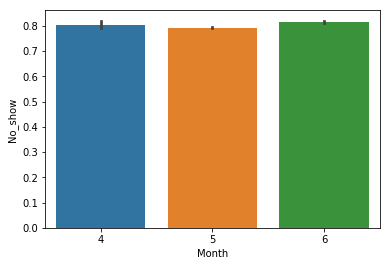

In [36]:
ax = sns.barplot(x=data['AppointmentDay'].dt.month,y='No_show', data=data)
ax.set_xlabel('Month')

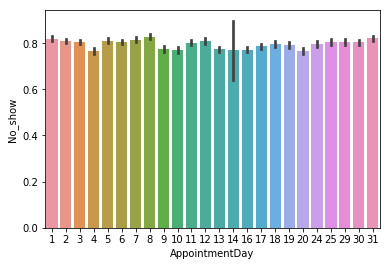

In [37]:
sns.barplot(x=data['AppointmentDay'].dt.day,y='No_show', data=data)

In [1]:
#added to create presentation
print(data.groupby('AppointmentDay').sum().reset_index())

NameError: name 'data' is not defined

In [28]:
data['AppointmentDayDD'] = pd.Series(data['AppointmentDay'].dt.day, index=data.index)

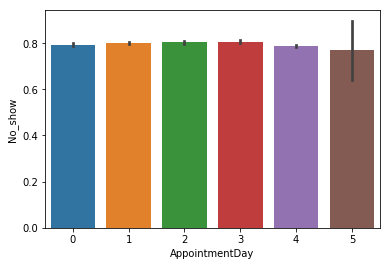

In [29]:
sns.barplot(x=data['AppointmentDay'].dt.weekday,y='No_show', data=data)

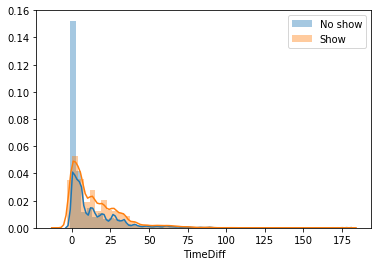

In [30]:
data['TimeDiff'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
ax = sns.distplot(data[data['No_show'] == 1].TimeDiff, label ='No show')
ax = sns.distplot(data[data['No_show'] == 0].TimeDiff, label = 'Show')
ax.legend()

In [31]:
data.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,No_show,Age_Category,ScheduleMonthMM,ScheduleDayDD,AppointmentDayDD,TimeDiff
0,#29872499824296,5642903,0,2016-04-29 18:38:08,2016-04-29,62,40,0,1,0,0,0,0,1,8,4,29,29,-1
1,#558997776694438,5642503,1,2016-04-29 16:08:27,2016-04-29,56,40,0,0,0,0,0,0,1,7,4,29,29,-1
2,#4262962299951,5642549,0,2016-04-29 16:19:04,2016-04-29,62,47,0,0,0,0,0,0,1,8,4,29,29,-1
3,#867951213174,5642828,0,2016-04-29 17:29:31,2016-04-29,8,55,0,0,0,0,0,0,1,1,4,29,29,-1
4,#8841186448183,5642494,0,2016-04-29 16:07:23,2016-04-29,56,40,0,1,1,0,0,0,1,7,4,29,29,-1


In [32]:
#Patiend ID and Appointment ID should not be relevent parameters
data = data.drop("PatientID", axis=1)
data = data.drop("AppointmentID", axis=1)
data = data.drop("ScheduledDay", axis=1)
data = data.drop("AppointmentDay", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("Disability", axis=1)

In [33]:
data.head()

,Gender,LocationID,MedicaidIND,Hypertension,Diabetes,Alcoholism,SMS_received,No_show,Age_Category,ScheduleMonthMM,ScheduleDayDD,AppointmentDayDD,TimeDiff
0,0,40,0,1,0,0,0,1,8,4,29,29,-1
1,1,40,0,0,0,0,0,1,7,4,29,29,-1
2,0,47,0,0,0,0,0,1,8,4,29,29,-1
3,0,55,0,0,0,0,0,1,1,4,29,29,-1
4,0,40,0,1,1,0,0,1,7,4,29,29,-1


In [34]:
msk = np.random.rand(len(data)) < 0.8
training_data = data[msk]
testing_data = data[~msk]

#there are other ways to split e.g. from sklearn.model_selection import train_test_split
X_train = training_data.drop("No_show", axis=1)
Y_train = training_data["No_show"]
X_test  = testing_data

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [36]:
print(round(acc_decision_tree,2,), "%")

97.29 %


In [37]:
#Lets try a Suppoer Vector Classification
#Normalize the data first SVC works better with normalized variables
x = X_train.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_normalized = pd.DataFrame(x_scaled)

linear_svc = LinearSVC()
linear_svc.fit(X_train_normalized, Y_train)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

/Users/Udara/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


65.39 %


In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.29 %


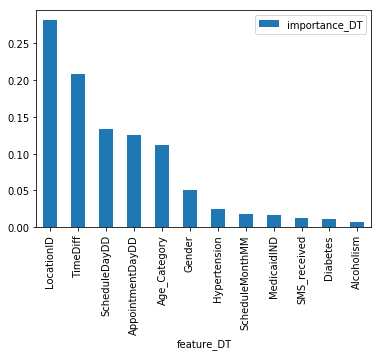

In [39]:
#Feature importance for DT
Feature_imp = pd.DataFrame({'feature_DT':X_train.columns,'importance_DT':np.round(decision_tree.feature_importances_,4)})
Feature_imp = Feature_imp.sort_values('importance_DT',ascending=False).set_index('feature_DT')
Feature_imp.plot.bar()

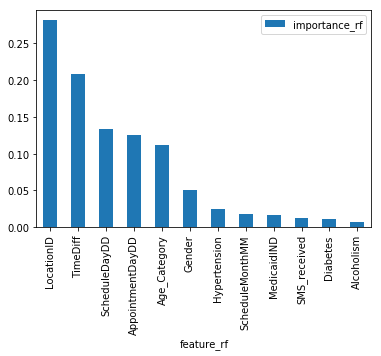

In [40]:
#Feature importance for RF
Feature_imp = pd.DataFrame({'feature_rf':X_train.columns,'importance_rf':np.round(decision_tree.feature_importances_,4)})
Feature_imp = Feature_imp.sort_values('importance_rf',ascending=False).set_index('feature_rf')
Feature_imp.plot.bar()

In [41]:
#Alcoholism and SMS_received is not that much important I am going to drop them
training_data  = training_data.drop("SMS_received", axis=1)
testing_data  = testing_data.drop("SMS_received", axis=1)
training_data  = training_data.drop("Alcoholism", axis=1)
testing_data  = testing_data.drop("Alcoholism", axis=1)
training_data  = training_data.drop("Diabetes", axis=1)
testing_data  = testing_data.drop("Diabetes", axis=1)

In [42]:
X_train = training_data.drop("No_show", axis=1)
Y_train = training_data["No_show"]
X_test  = testing_data.drop("No_show", axis=1)
Y_test  = testing_data["No_show"] 

decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
Y_test_pred = decision_tree.predict(X_test)
print(round(acc_decision_tree,2,), "%")

96.79 %


In [43]:
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
Y_test_pred_rf = decision_tree.predict(X_test)

96.79 %


In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)
print("Tn \t Fp \nFn \t Tp\n")
print("DT")
print(confusion_matrix(Y_train, predictions))
print("RF")
predictions_rf = cross_val_predict(random_forest, X_train, Y_train, cv=3)
print(confusion_matrix(Y_train, predictions_rf))


Tn 	 Fp 
Fn 	 Tp

DT
[[ 6074 11746]
 [15895 54709]]
RF
[[ 2708 15112]
 [ 5958 64646]]


In [45]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

DT_train_Pr = round(precision_score(Y_train, predictions),2)
DT_train_Rec = round(recall_score(Y_train, predictions),2)
DT_train_F = round(f1_score(Y_train, predictions),2)

DT_test_Pr  = round(precision_score(Y_test, Y_test_pred),2)
DT_test_Rec = round(recall_score(Y_test, Y_test_pred),2)
DT_test_F   = round(f1_score(Y_test, Y_test_pred),2)

RF_train_Pr  = round(precision_score(Y_train, predictions_rf),2)
RF_train_Rec = round(recall_score(Y_train, predictions_rf),2)
RF_train_F   = round(f1_score(Y_train, predictions_rf),2)

RF_test_Pr   = round(precision_score(Y_test, Y_test_pred_rf),2)
RF_test_Rec  = round(recall_score(Y_test, Y_test_pred_rf),2)
RF_test_F    = round(f1_score(Y_test, Y_test_pred_rf),2)

result_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F-score'],
    'DT_Train': [DT_train_Pr, DT_train_Rec, DT_train_F],
    'DT_Test': [DT_test_Pr, DT_test_Rec, DT_test_F],
    'RF_Train': [RF_train_Pr, RF_train_Rec, RF_train_F],
    'RF_Test':[RF_test_Pr, RF_test_Rec, RF_test_F] })
#result_df = result_df.set_index('Metric')
result_df.head(3)

,Metric,DT_Train,DT_Test,RF_Train,RF_Test
0,Precision,0.82,0.84,0.81,0.84
1,Recall,0.77,0.82,0.92,0.82
2,F-score,0.80,0.83,0.86,0.83


In [46]:
#Random forost is showing signs for over training. 
#This could be over come by tuning hyper parameters.
#In this work I am going to tune parameters of the DT.
#Lets start with max_depth, I use Area Under Curve as my performance metric

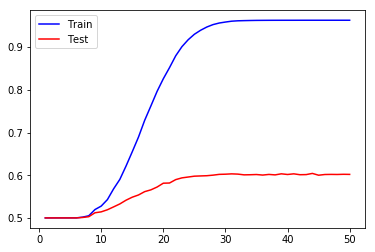

In [47]:
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    #Trining
    d_tree= DecisionTreeClassifier(max_depth=max_depth)
    d_tree.fit(X_train, Y_train)
    train_pred = d_tree.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Append the AUC
    train_results.append(roc_auc)
    #Testing
    Y_pred = d_tree.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.plot(max_depths, train_results, color='b', label='Train')
plt.plot(max_depths, test_results, color='r', label='Test')
plt.legend()
#plt.xlabel(‘Tree depth’)
plt.show()

In [48]:
#I decide max_depth = 22 is the optimum
#Next I am going to look at minimum sample split

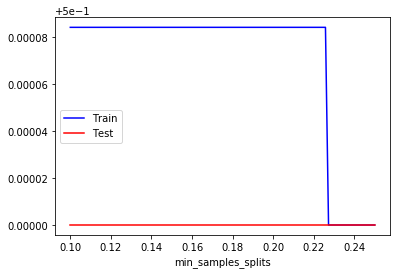

In [49]:
min_samples_splits = np.linspace(0.1, 0.25, 100, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    #Traning
    d_tree_min_samp= DecisionTreeClassifier(max_depth=22, min_samples_split=min_samples_split)
    d_tree_min_samp.fit(X_train, Y_train)
    train_pred = d_tree_min_samp.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Append the AUC
    train_results.append(roc_auc)
    #Testing
    Y_pred = d_tree_min_samp.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.plot(min_samples_splits, train_results, color='b', label='Train')
plt.plot(min_samples_splits, test_results, color='r', label='Test')
plt.legend()
plt.xlabel('min_samples_splits')
plt.show()

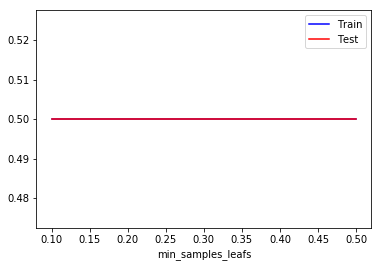

In [50]:
#min_samples_split > 0.22 causes under training.
#Therefore, I decided min_samples_split = 0.22
min_samples_leafs = np.linspace(0.1, 0.5, 25, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    #Traning
    d_tree_leaf= DecisionTreeClassifier(max_depth=22, min_samples_leaf = min_samples_leaf)
    d_tree_leaf.fit(X_train, Y_train)
    train_pred = d_tree_leaf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Append the AUC
    train_results.append(roc_auc)
    #Testing
    Y_pred = d_tree_leaf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.plot(min_samples_leafs, train_results, color='b', label='Train')
plt.plot(min_samples_leafs, test_results, color='r', label='Test')
plt.legend()
plt.xlabel('min_samples_leafs')
plt.show()

In [51]:
#Conclusion is in this case min_samples_leaf does not matter
#Nextlook at max_features

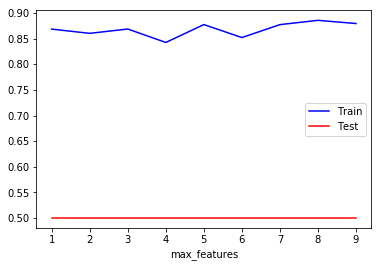

In [53]:
#min_samples_split > 0.22 causes under training.
#Therefore, I decided min_samples_split = 0.22
max_features_list = list(range(1,10))
train_results = []
test_results = []
for max_features in max_features_list:
    #Traning
    d_tree_feature= DecisionTreeClassifier(max_depth=22, max_features = max_features)
    d_tree_feature.fit(X_train, Y_train)
    train_pred = d_tree_feature.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Append the AUC
    train_results.append(roc_auc)
    #Testing
    Y_pred = d_tree_leaf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.plot(max_features_list, train_results, color='b', label='Train')
plt.plot(max_features_list, test_results, color='r', label='Test')
plt.legend()
plt.xlabel('max_features')
plt.show()

In [ ]:
#Conclusion max_features does not really matter

In [54]:
data = data.drop("SMS_received", axis=1)
data = data.drop("Alcoholism", axis=1)
data = data.drop("Diabetes", axis=1)

In [55]:
X = data.drop("No_show", axis=1)
Y = data["No_show"]

In [56]:
from sklearn.model_selection import train_test_split
test_sizes = np.linspace(0.1, 0.9, 9, endpoint=True)
DT_train_Pr  = []
DT_train_Rec = []
DT_test_Pr = []
DT_test_Rec = []
for test_size in test_sizes:
    X_train_itr, X_test_itr, Y_train_itr, Y_test_itr = train_test_split(X, Y, test_size=test_size)
    d_tree_itr= DecisionTreeClassifier(max_depth=22)
    d_tree_itr.fit(X_train_itr, Y_train_itr)
    predictions_itr = cross_val_predict(d_tree_itr, X_train_itr, Y_train_itr, cv=3)
    Y_test_pred_itr = decision_tree.predict(X_test_itr)
    
    DT_train_Pr.append(round(precision_score(Y_train_itr, predictions_itr),2))
    DT_train_Rec.append(round(recall_score(Y_train_itr, predictions_itr),2))
    DT_test_Pr.append(round(precision_score(Y_test_itr, Y_test_pred_itr),2))
    DT_test_Rec.append(round(recall_score(Y_test_itr, Y_test_pred_itr),2))
    

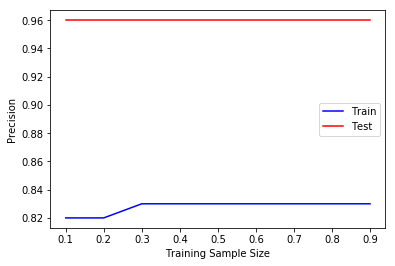

In [57]:
plt.plot(1-test_sizes, DT_train_Pr, color='b', label='Train')
plt.plot(1-test_sizes, DT_test_Pr, color='r', label='Test')
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Training Sample Size')
plt.show()

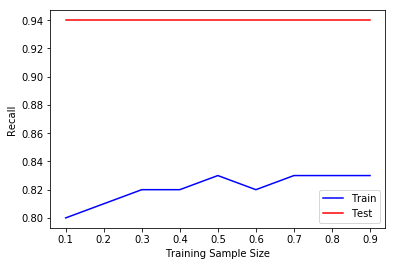

In [58]:
plt.plot(1-test_sizes, DT_train_Rec, color='b', label='Train')
plt.plot(1-test_sizes, DT_test_Rec, color='r', label='Test')
plt.legend()
plt.ylabel('Recall')
plt.xlabel('Training Sample Size')
plt.show()

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
d_tree_final= DecisionTreeClassifier(max_depth=22)
d_tree_final.fit(X_train, Y_train)
predictions = cross_val_predict(d_tree_final, X_train, Y_train, cv=3)
Y_test_pred = d_tree_final.predict(X_test)
print("Tn \t Fp \nFn \t Tp\n")
print("DT")
print(confusion_matrix(Y_train, predictions))
DT_train_Pr = round(precision_score(Y_train, predictions),2)
DT_train_Rec = round(recall_score(Y_train, predictions),2)
DT_train_F = round(f1_score(Y_train, predictions),2)

DT_test_Pr  = round(precision_score(Y_test, Y_test_pred),2)
DT_test_Rec = round(recall_score(Y_test, Y_test_pred),2)
DT_test_F   = round(f1_score(Y_test, Y_test_pred),2)

result_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F-score'],
    'DT_Train': [DT_train_Pr, DT_train_Rec, DT_train_F],
    'DT_Test': [DT_test_Pr, DT_test_Rec, DT_test_F]})
#result_df = result_df.set_index('Metric')
result_df.head(3)

Tn 	 Fp 
Fn 	 Tp

DT
[[ 5045 10523]
 [10508 51292]]


,Metric,DT_Train,DT_Test
0,Precision,0.83,0.83
1,Recall,0.83,0.84
2,F-score,0.83,0.83


In [60]:
X = X.drop("ScheduleMonthMM", axis=1)
X = X.drop("Hypertension", axis=1)
X = X.drop("MedicaidIND", axis=1)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
d_tree_final= DecisionTreeClassifier(max_depth=22)
d_tree_final.fit(X_train, Y_train)
predictions = cross_val_predict(d_tree_final, X_train, Y_train, cv=3)
Y_test_pred = d_tree_final.predict(X_test)
X_test['Pred'] = Y_test_pred
X_test['True'] = Y_test

print("Tn \t Fp \nFn \t Tp\n")
print("DT")
print(confusion_matrix(Y_train, predictions))
DT_train_Pr = round(precision_score(Y_train, predictions),2)
DT_train_Rec = round(recall_score(Y_train, predictions),2)
DT_train_F = round(f1_score(Y_train, predictions),2)

DT_test_Pr  = round(precision_score(Y_test, Y_test_pred),2)
DT_test_Rec = round(recall_score(Y_test, Y_test_pred),2)
DT_test_F   = round(f1_score(Y_test, Y_test_pred),2)

result_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F-score'],
    'DT_Train': [DT_train_Pr, DT_train_Rec, DT_train_F],
    'DT_Test': [DT_test_Pr, DT_test_Rec, DT_test_F]})
result_df.head(3)

/Users/Udara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Udara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Tn 	 Fp 
Fn 	 Tp

DT
[[ 5192 10358]
 [10752 51066]]


,Metric,DT_Train,DT_Test
0,Precision,0.83,0.83
1,Recall,0.83,0.83
2,F-score,0.83,0.83


In [82]:
X_test_combined = X_test.groupby('AppointmentDayDD').agg(['mean'])

In [85]:
True_Show_up = X_test_combined['True'].head(10)
Pred_Show_up = X_test_combined['Pred'].head(10)

In [86]:
True_Show_up = True_Show_up*5400

In [87]:
Pred_Show_up = Pred_Show_up*5400

In [88]:
print(True_Show_up)

                         mean
AppointmentDayDD             
1                 4388.000000
2                 4373.896353
3                 4291.920000
4                 4044.587009
5                 4371.036585
6                 4344.169611
7                 4447.546012
8                 4487.892377
9                 4191.104522
10                4218.489985


In [89]:
print(Pred_Show_up)

                         mean
AppointmentDayDD             
1                 4372.000000
2                 4407.063340
3                 4250.880000
4                 4027.265437
5                 4305.182927
6                 4412.014134
7                 4480.674847
8                 4475.784753
9                 4243.143069
10                4214.329738


In [90]:
print(True_Show_up-Pred_Show_up)

                       mean
AppointmentDayDD           
1                 16.000000
2                -33.166987
3                 41.040000
4                 17.321572
5                 65.853659
6                -67.844523
7                -33.128834
8                 12.107623
9                -52.038547
10                 4.160247


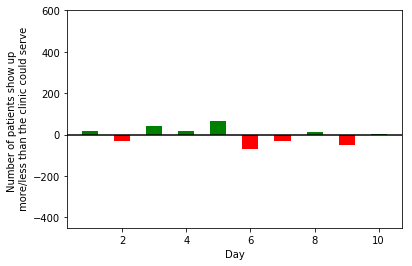

In [128]:
ax_1 = plt.subplot(111)
x_selected = range(1,11)
y_selected = True_Show_up-Pred_Show_up
y_sel_list = y_selected['mean'].values

y_color = []
for item in y_sel_list:
    if(item < 0):
        y_color.append('r')
    else:
        y_color.append('g')
ax_1.set_ylim([-450, 600])
ax_1.bar(x_selected, y_sel_list, width=0.5, color=y_color)
ax_1.set_ylabel('Number of patients show up \n more/less than the clinic could serve')
ax_1.set_xlabel('Day')
ax_1.axhline(0, color="black")